In [1]:
# load packages
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import *
import random

In [2]:
# load dataset 
pima = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
# read the head rows of the data
pima.head(10)

,n_preg,glucose,blood_pre,thickness,insulin,bmi,pedigree_fun,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# some simple descriptive statistics 
pima.describe()

,n_preg,glucose,blood_pre,thickness,insulin,bmi,pedigree_fun,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# notice that for some attributes the value 0 doesn't really make any sense
# value 0 corresponds to missing value and needs to be imputed
# check how many zeros each attributes have
cols = ['n_preg', 'glucose', 'blood_pre', 'thickness', 'insulin', 'bmi', 'pedigree_fun', 'age']
for col in cols:
    print pima[pima[col]==0].shape

(111, 9)
(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)
(0, 9)
(0, 9)


In [6]:
# replace zero value with mean of its corresponding class
for col in cols:
    mean0 = pima.loc[pima[col]!=0, [col, 'class']].groupby('class').mean().iloc[0,0]
    mean1 = pima.loc[pima[col]!=0, [col, 'class']].groupby('class').mean().iloc[1,0]
    pima.loc[(pima[col]==0) & (pima['class']==0), col] = mean0
    pima.loc[(pima[col]==0) & (pima['class']==1), col] = mean1

In [7]:
# read the imputed data
pima.head(10)

,n_preg,glucose,blood_pre,thickness,insulin,bmi,pedigree_fun,age,class
0,6.000000,148.0,72.000000,35.000000,206.846154,33.600000,0.627,50.0,1
1,1.000000,85.0,66.000000,29.000000,130.287879,26.600000,0.351,31.0,0
2,8.000000,183.0,64.000000,33.000000,206.846154,23.300000,0.672,32.0,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0
4,5.669565,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1
5,5.000000,116.0,74.000000,27.235457,130.287879,25.600000,0.201,30.0,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1
7,10.000000,115.0,70.877339,27.235457,130.287879,35.300000,0.134,29.0,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1
9,8.000000,125.0,96.000000,33.000000,206.846154,35.406767,0.232,54.0,1


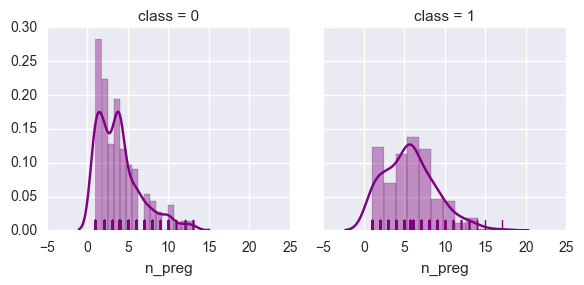

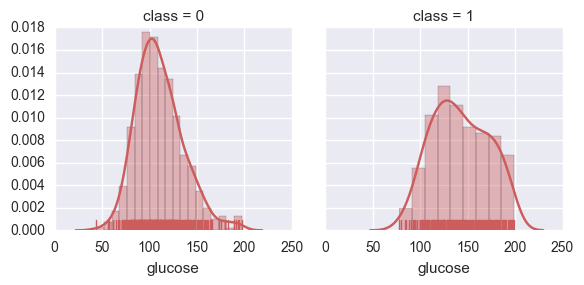

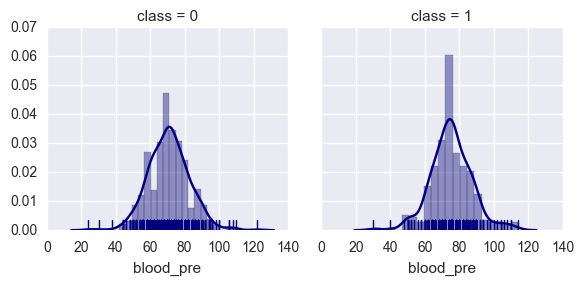

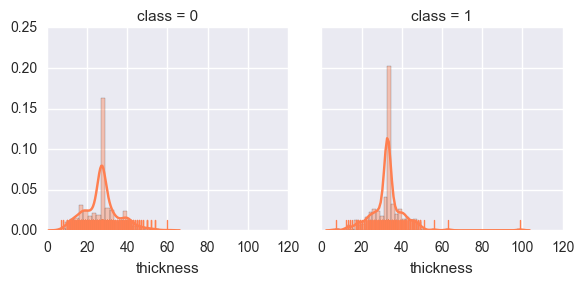

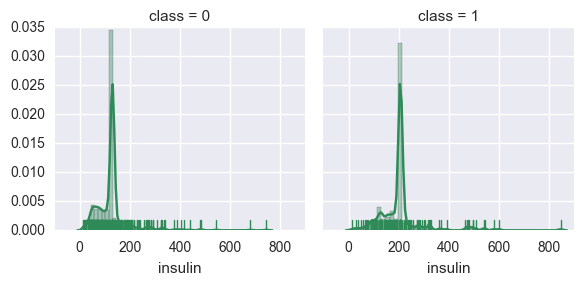

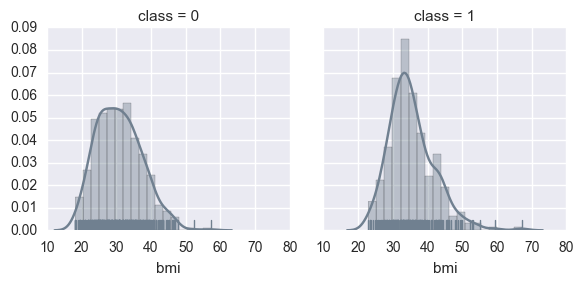

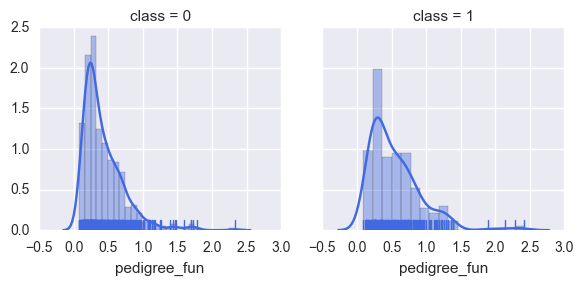

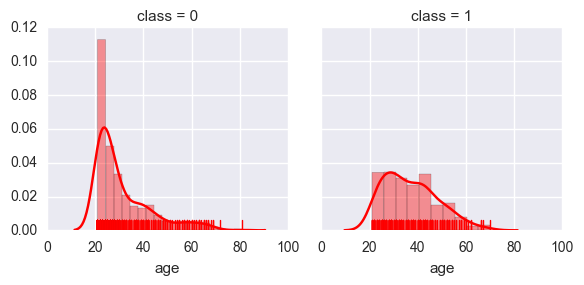

In [8]:
# plot disributions with kernel estimates for each of the features 
# grouped by the class variable to see the influence of class
g1 = sns.FacetGrid(pima, col='class')
g1.map(sns.distplot, 'n_preg', rug=True, color='Purple')

g2 = sns.FacetGrid(pima, col='class')
g2.map(sns.distplot, 'glucose', rug=True, color='indianred')

g3 = sns.FacetGrid(pima, col='class')
g3.map(sns.distplot, 'blood_pre', rug=True, color='navy')

g4 = sns.FacetGrid(pima, col='class')
g4.map(sns.distplot, 'thickness', rug=True, color='coral')

g5 = sns.FacetGrid(pima, col='class')
g5.map(sns.distplot, 'insulin', rug=True, color='seagreen')

g6 = sns.FacetGrid(pima, col='class')
g6.map(sns.distplot, 'bmi', rug=True, color='slategray')

g7 = sns.FacetGrid(pima, col='class')
g7.map(sns.distplot, 'pedigree_fun', rug=True, color='royalblue')

g8 = sns.FacetGrid(pima, col='class')
g8.map(sns.distplot, 'age', rug=True, color='Red')

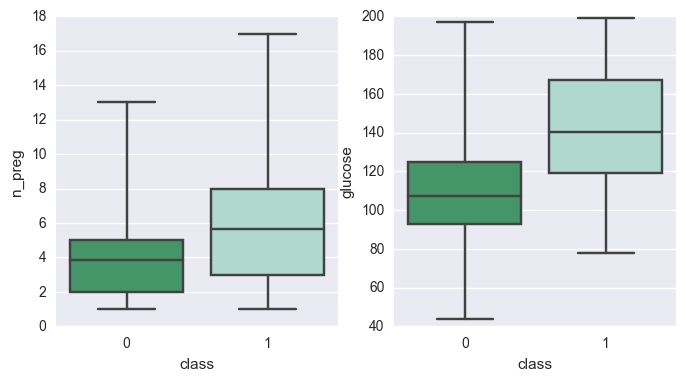

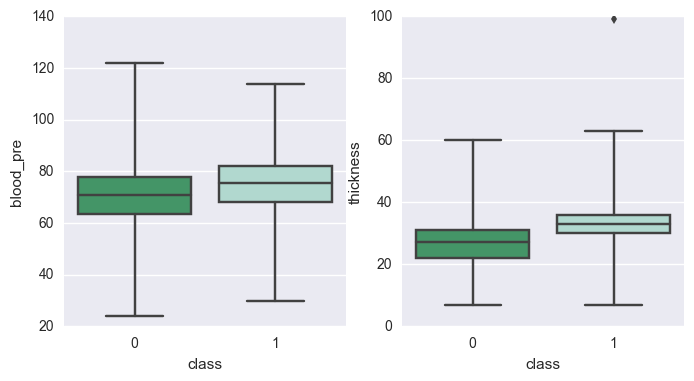

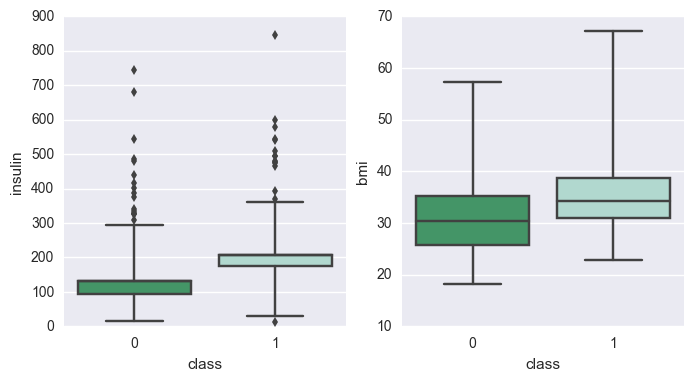

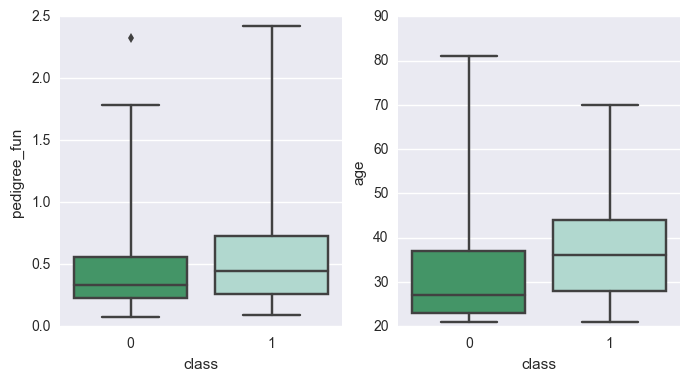

In [9]:
# draw box plots for each attribute
n_cols = 2
n_rows = 4

attr_idx = 0
for i in range(n_rows):
    fg, axes = plt.subplots(nrows=1, ncols=n_cols, sharey=False, figsize=(8, 4))
    for j in range(n_cols):
        sns.boxplot(x=pima['class'], y=pima[cols[attr_idx]], ax=axes[j], palette='BuGn_r', whis=5.0)
        attr_idx += 1
        if attr_idx >= 8:
            break

In [10]:
# some simple descriptive statistics for the feature variables 
descriptives = pima.describe()
feature_des = descriptives.iloc[:, :-1]
feature_des

,n_preg,glucose,blood_pre,thickness,insulin,bmi,pedigree_fun,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,4.492652,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885
std,2.993238,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000
50%,3.861827,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000


In [11]:
# check for extreme outliers
Q1s = feature_des.iloc[4, :]
Q3s = feature_des.iloc[6, :]
IQRs = Q3s - Q1s
lower_bound = Q1s - 5 * IQRs
upper_bound = Q3s + 5 * IQRs
print lower_bound, '\n', upper_bound

n_preg          -18.000000
glucose        -106.500000
blood_pre       -16.000000
thickness       -15.000000
insulin        -305.230769
bmi             -18.000000
pedigree_fun     -1.668750
age             -61.000000
dtype: float64 
n_preg           26.000000
glucose         347.250000
blood_pre       160.000000
thickness        73.000000
insulin         633.576923
bmi              82.100000
pedigree_fun      2.538750
age             126.000000
dtype: float64


In [13]:
# compare outlier bounds with the min & max values of each attribute
# and find that none of the attributes have extremely low values
print feature_des.iloc[3, :] - lower_bound

n_preg           19.000000
glucose         150.500000
blood_pre        40.000000
thickness        22.000000
insulin         319.230769
bmi              36.200000
pedigree_fun      1.746750
age              82.000000
dtype: float64


In [14]:
# if the maximum value of an attribute exceend the upper bound
# then we say the attribute has extremely large values (outliers)
print upper_bound - feature_des.iloc[7, :]

n_preg            9.000000
glucose         148.250000
blood_pre        38.000000
thickness       -26.000000
insulin        -212.423077
bmi              15.000000
pedigree_fun      0.118750
age              45.000000
dtype: float64


In [16]:
# we see that attributes thickness & insulin have extremely large values 
# that might influence our following models
# so the next step to try is to eliminate those outliers
outlier_cols = ['thickness', 'insulin']
for col in outlier_cols:
    print pima[pima[col]>upper_bound[col]].shape[0]
    pima = pima[pima[col]<=upper_bound[col]]

1
3


In [17]:
# see how many outliers are removed
pima.shape

(764, 9)

In [18]:
# after removing outliers, check the distribution of classes
print pima.groupby('class').size()
print pima.groupby('class').size() * 100 / pima.shape[0]

class
0    498
1    266
dtype: int64
class
0    65.183246
1    34.816754
dtype: float64


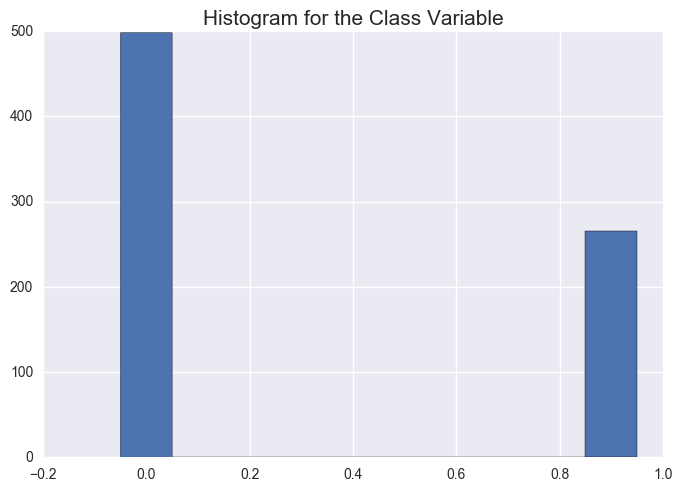

In [19]:
# plot class distribution
plt.hist(pima['class'], histtype='barstacked', align='left')
plt.title('Histogram for the Class Variable', fontsize=15)

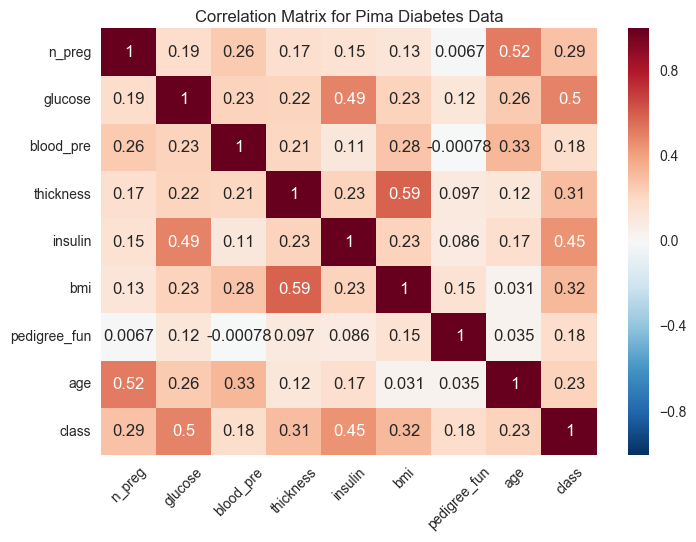

In [20]:
# we want to see the correlation between pairs of variables
# a basis for feature selection
corr = pima.corr()
ax = sns.heatmap(corr, annot = True)   # BrBG
plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.title('Correlation Matrix for Pima Diabetes Data')

In [21]:
# wee see that some features are moderately correlated 
# e.g. n_preg vs. age, glucose vs. insulin and thickness vs. bmi
# we want to select variables so that they're correlated with 
# the target variable but are least intercorrelated as
# as for the target variable, it has moderate to strong correlation 
# with all of the feature variables

# now we want to split the dataset into training and testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(pima[cols], pima['class'],
                                               test_size=0.25,random_state=100)
print 'train size is %i' %y_train.shape[0]
print 'test size is %i' %y_test.shape[0]

train size is 573
test size is 191


In [22]:
# before we apply machine learning, 
# we're gonna scale the features so that they all lie within [0,1]
import numpy as np

def minmaxscale(z):
    mins = z.min(axis=0)
    maxs = z.max(axis=0)
    ranges = maxs - mins
    
    scaled_z = np.zeros(np.shape(z))
    m = z.shape[0]
    
    scaled_z = z - np.tile(mins, (m, 1))
    scaled_z = scaled_z / np.tile(ranges, (m, 1))
    
    return scaled_z
        
X_train = minmaxscale(X_train)
X_test = minmaxscale(X_test)

In [23]:
# check scaling
X_test.head()

,n_preg,glucose,blood_pre,thickness,insulin,bmi,pedigree_fun,age
674,0.583333,0.250000,0.565217,0.344709,0.192934,0.424403,0.280441,0.921569
110,0.166667,0.821429,0.456522,0.460000,0.201031,0.363395,0.066667,0.058824
698,0.250000,0.507143,0.630435,0.020000,0.235395,0.395225,0.286501,0.137255
749,0.416667,0.757143,0.347826,0.460000,0.324478,0.124668,0.055096,0.568627
407,0.238486,0.321429,0.347826,0.344709,0.192934,0.061008,0.142149,0.078431


In [24]:
# import evaluating functions
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

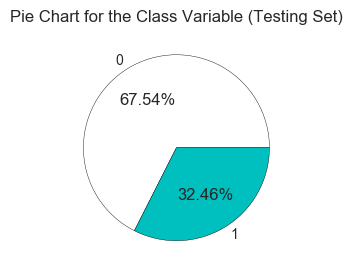

In [26]:
# plot the bar chart of class proportions for testing set
target=['0', '1']
plt.figure(figsize=(3,3))
plt.pie(y_test.value_counts(), labels=target, colors=('w', 'c'), autopct='%1.2f%%')
plt.title('Pie Chart for the Class Variable (Testing Set)', fontsize=12, verticalalignment='bottom', horizontalalignment='center')

In [27]:
# null accuracy for binary classification problems could be achieved 
# by always predicting the most frequent class
print y_test.value_counts()

0    129
1     62
Name: class, dtype: int64


In [28]:
# compute null-accuracy
null_accuracy = 1 - y_test.mean()
print null_accuracy

0.675392670157


[[ 0.11658438]
 [ 0.20827502]
 [ 0.80162908]
 [ 0.49899595]
 [ 0.37232519]
 [ 0.55405006]
 [ 0.83561536]
 [ 0.15325384]
 [ 0.24490246]] 
1.16334990788 
1.16334990788 
1 

[[-0.01713782]
 [ 0.18543316]
 [ 0.74578839]
 [ 0.42981127]
 [ 0.32525689]
 [ 0.52889207]
 [ 0.80229661]
 [ 0.13472555]
 [ 0.22348067]] 
1.04553043918 
0.117819468699 
2 

[[-0.13876795]
 [ 0.16522063]
 [ 0.69589086]
 [ 0.36709557]
 [ 0.28286161]
 [ 0.50664307]
 [ 0.77232353]
 [ 0.11817233]
 [ 0.20445388]] 
0.94676602238 
0.0987644168038 
3 

[[-0.24802915]
 [ 0.14773585]
 [ 0.65213825]
 [ 0.31103005]
 [ 0.24528767]
 [ 0.48740497]
 [ 0.74581262]
 [ 0.10365146]
 [ 0.18791914]] 
0.866405863997 
0.0803601583827 
4 

[[-0.34516875]
 [ 0.13295528]
 [ 0.61446407]
 [ 0.26150918]
 [ 0.21247341]
 [ 0.47114818]
 [ 0.72272921]
 [ 0.09113278]
 [ 0.17386094]] 
0.802784748307 
0.0636211156897 
5 

[[-0.43086642]
 [ 0.12075047]
 [ 0.58257226]
 [ 0.21818706]
 [ 0.18417912]
 [ 0.4577301 ]
 [ 0.70290892]
 [ 0.08051248]
 [ 0.16216607]] 

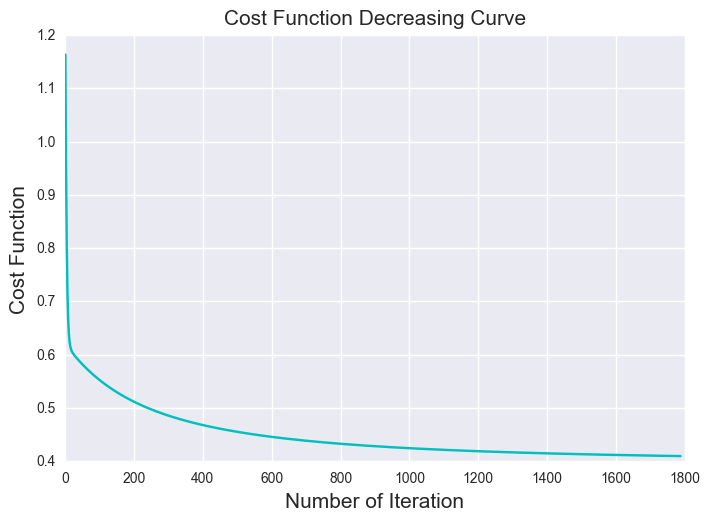

In [29]:
# Training Logistic Regression Model using gradient descent algorithm & plot the cost function

random.seed(100)   # Set random seed number 100

n = X_train.shape[1] + 1   # Get the number of features
m = len(y_train)   # and instances in training set 

x0_train = ones((1, m))   # Add for each instance a bias term x0=1
X_train0 = mat(X_train.values).T   # Prepare for the inputs
X_train0 = row_stack((x0_train, X_train0))
y = mat(y_train.values)

alpha = 0.3   # Set learning rate
reg_param = 0.01   # regularization parameter
epselon = 10**(-5)   # cost function deceasing range
max_iter = 10000   # maximum number of iteration

cost_fun0 = 0   # Initializations
cost_funs = []
num_iter = 0

theta = (1 - 0.1) * np.random.random((n,1)) + 0.1   # Randomly assign numbers to initial weights

while True:   # Begin iteration

    h = 1.0 / (1 + exp(-dot(theta.T, X_train0)))   # Compute hypothesis function
    
    cost_fun = ((-1.0 / m) * (dot(y, log(h).T) + dot((1 - y), log(1 - h).T)) + (reg_param / (2 * m)) * dot(theta.T, theta))[0,0]   # Compute the cost function
    descend_range = abs(cost_fun0 - cost_fun)   # Store descending range for the cost function
    cost_fun0 = cost_fun
    cost_funs.append(cost_fun)

    temp = [0 for j in range(n)]
    for j in range(1, n):
        temp[0] = theta[0] - (alpha / m) * dot(X_train0[0], (h - y).T)   # Adjust weight for x0
        temp[j] = theta[j] * (1 - alpha * reg_param / m) - (alpha / m) * dot(X_train0[j], (h - y).T)   # Adjust weight for feature variales 

    for j in range(n):
        theta[j] = temp[j]

    num_iter = num_iter + 1

    if descend_range < epselon:   # Condition 1 for jumping out of the loop
        break
    print theta, '\n', cost_fun, '\n', descend_range, '\n', num_iter, '\n'
    
    if num_iter > max_iter:   # Condition 2 for ending the iteration
        print 'number of iteration reaches maximum'
        break

print theta, '\n', cost_fun, '\n', descend_range, '\n', num_iter, '\n'
    
plt.plot(range(1,num_iter+1), cost_funs, 'c-')   # Plot the trajectory of cost funtion
plt.title('Cost Function Decreasing Curve', fontsize=15, verticalalignment='bottom')
plt.xlabel('Number of Iteration', fontsize=15)
plt.ylabel('Cost Function', fontsize=15)


def logit_predict(X_test, prob=False, threshold=0.5):   # Define prediction function
    x0_test = ones((1, X_test.shape[0]))
    X_test0 = row_stack((x0_test, mat(X_test.values).T))
    h = 1.0 / (1 + exp(-dot(theta.T, X_test0)))
    
    if prob == True:
        return array(h)[0]
    
    else:
        h_prob = zeros((h.shape))
        for i in range(h.shape[1]):
            if h[0, i] >= threshold:
                h_prob[0, i] = 1
            else:
                h_prob[0, i] = 0
        return h_prob[0, :]

In [30]:
# define prediction function
def logit_predict(X_test, prob=False, threshold=0.5):
    x0_test = ones((1, X_test.shape[0]))
    X_test0 = row_stack((x0_test, mat(X_test.values).T))
    h = 1.0 / (1 + exp(-dot(theta.T, X_test0)))
    
    if prob == True:
        return array(h)[0]
    
    else:
        h_prob = zeros((h.shape))
        for i in range(h.shape[1]):
            if h[0, i] >= threshold:
                h_prob[0, i] = 1
            else:
                h_prob[0, i] = 0
        return h_prob[0, :]

In [31]:
# get the weights
theta

array([[-6.00305414],
       [ 2.17710738],
       [ 3.98152628],
       [-0.55267722],
       [ 1.87011302],
       [ 4.44343743],
       [ 2.18473011],
       [ 1.97874061],
       [ 0.98906511]])

accuracy score:  0.8184991274
auc score:  0.784552845528
confusion matrix:  
[[333  36]
 [ 68 136]]


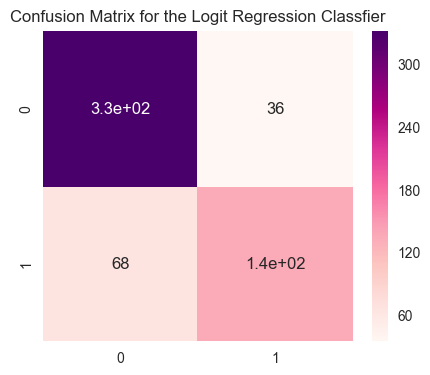

In [32]:
# now we compute some classification performance metrics 
# for the training set 
y_fit_logit = logit_predict(X_train)

accuracy_fit_logit = accuracy_score(y_train, y_fit_logit)
auc_fit_logit = roc_auc_score(y_train, y_fit_logit)

print 'accuracy score: ', accuracy_fit_logit
print 'auc score: ', auc_fit_logit

target = ['0', '1']
conf_fit_logit = confusion_matrix(y_train, y_fit_logit)
print 'confusion matrix: ', '\n', conf_fit_logit

plt.figure(figsize=(5,4))
sns.heatmap(conf_fit_logit, annot=True, xticklabels=target, yticklabels=target, cmap='RdPu')   # 'RdPu'
plt.title('Confusion Matrix for the Logit Regression Classfier', fontsize=12, verticalalignment='bottom')

accuracy score:  0.769633507853
auc score:  0.754063515879
confusion matrix:  
[[103  26]
 [ 18  44]]


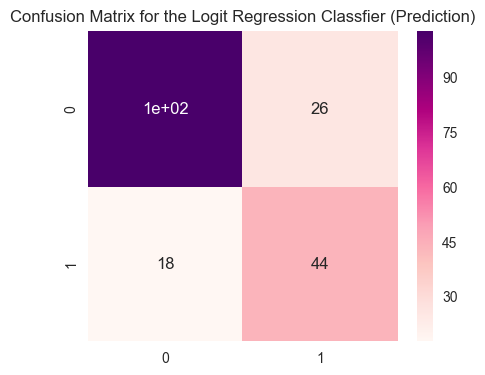

In [33]:
# now we compute some classification performance metrics 
# for the testing set 
y_pred_logit = logit_predict(X_test)

accuracy_logit = accuracy_score(y_test, y_pred_logit)
auc_logit = roc_auc_score(y_test, y_pred_logit)

print 'accuracy score: ', accuracy_logit
print 'auc score: ', auc_logit

target = ['0', '1']
conf_logit = confusion_matrix(y_test, y_pred_logit)
print 'confusion matrix: ', '\n', conf_logit

plt.figure(figsize=(5,4))
sns.heatmap(conf_logit, annot=True, xticklabels=target, yticklabels=target, cmap='RdPu')   # 'RdPu'
plt.title('Confusion Matrix for the Logit Regression Classfier (Prediction)', fontsize=12, verticalalignment='bottom')

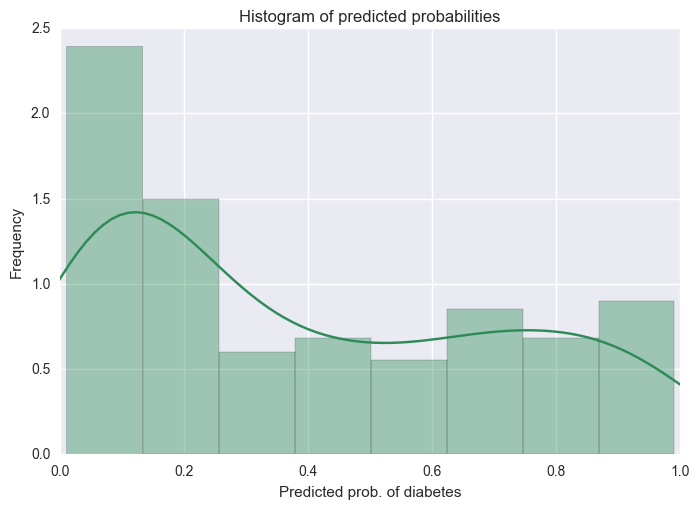

In [34]:
# Threshold 0.5 is used by default (for binary problems) 
# to convert predicted probabilities into classes
# Threshold can be adjusted to increase sensitivity or specificity
# Sensitivity and specificity have an inverse relationship 

# store the predicted prob. for class 1 and plot histograms 
y_pred_prob_logit = logit_predict(X_test, prob=True)
sns.distplot(y_pred_prob_logit, hist=True, bins=8, color='seagreen')
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted prob. of diabetes')
plt.ylabel('Frequency')

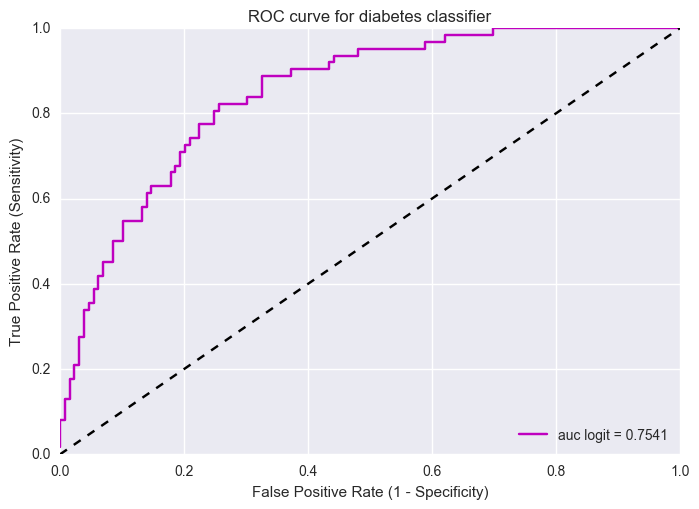

In [35]:
# and plot the ROC curve and compute AUC value for the predition
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, y_pred_prob_logit)

plt.hold(True)
plt.plot(fpr_logit, tpr_logit, 'm', label='auc logit = %0.4f'%auc_logit)
plt.plot([0,1], [0,1], 'k--')

plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)

In [36]:
# define a function that accepts a threshold and 
# outputs sensitivity and specificity
def evaluate_threshold(threshold):
    print 'Sensitivity:', tpr_logit[thresholds_logit > threshold][-1]
    print 'Specificity:', 1 - fpr_logit[thresholds_logit > threshold][-1]

In [37]:
# get sensitivity and specificity when threshold is set at 0.7
evaluate_threshold(0.7)

Sensitivity: 0.5
Specificity: 0.899224806202


In [38]:
# Training BP Neural Network Model 
from scipy import optimize   # Load optimization algorithms

class NNClassifier(object):   # Define NNClassifier class
    
    # Initialization for the class object 
    def __init__(self, reg_param=0.0, init_epsilon=0.15, hidden_units=10, activation='logsig', opt_method='BFGS', max_iter=1000):
        self.reg_param = reg_param   # regularization parameter
        self.init_epsilon = init_epsilon   # upper/lower bound of initial weights 
        self.hidden_units = hidden_units   # number of neurals in the single hidden layer
        self.activation = activation   # activation methods from input to hidden layer & from hidden to output layer
        self.method = opt_method   # optimization method for solving weights
        self.max_iter = max_iter   # maximum number of iteration
        
        if activation == 'logsig':
            self.activation_fun = self.logsig
            self.activation_deriv = self.logsig_deriv
            
        if activation == 'tansig':
            self.activation_fun = self.tansig
            self.activation_deriv = self.tansig_deriv
        
        
    def random_weight_init(self, inpt, outpt):   # function for assigning random numbers to initial weights 
        return 2 * self.init_epsilon * np.random.random((outpt, inpt + 1)) - self.init_epsilon

    
    def logsig(self, z):   # function for logistic activation function
        return 1.0 / (1 + np.exp(-z))


    def logsig_deriv(self, z):   # function for the derivative of logistic function
        sig = self.logsig(z)
        return sig * (1 - sig)
            
    def tansig(self, z):   # function for the hyperbolic tangent (tanh) activation function
        return np.tanh(z)
    
    def tansig_deriv(self, z):   # function for the derivative of tanh function
        return 1.0 - np.tanh(z)**2
            
    def join_thetas(self, t1, t2):   # function for joining the weights 
        return np.concatenate((t1.reshape(-1), t2.reshape(-1)))
    
    
    def unjoin_thetas(self, thetas, inpt_units, hidden_units, outpt_units):   
        t1_start = 0   # function for dividing weights into two parts (input to hidden layer & hidden to output layer)
        t1_end = hidden_units * (inpt_units + 1)
        t1 = thetas[t1_start:t1_end].reshape((hidden_units, inpt_units + 1))
        t2 = thetas[t1_end:].reshape((outpt_units, hidden_units + 1))
        return t1, t2
    
    
    def FP(self, X, t1, t2):   # function for forward propogation
        m = X.shape[0]
        ones = None
        if len(X.shape) == 1:
            ones = np.array(1).reshape(1)
        else:
            ones = np.ones(m).reshape(m,1)
        
        a1 = np.hstack((ones, X))   # adding bias units for the input layer
        
        z2 = np.dot(t1, a1.T) 
        a2 = self.activation_fun(z2)
        a2 = np.hstack((ones, a2.T))   # adding bias units for the hidden layer
        
        z3 = np.dot(t2, a2.T)   
        a3 = self.activation_fun(z3)   # output
        return a1, z2, a2, z3, a3
    
    
    def cost_function(self, thetas, inpt_units, hidden_units, outpt_units, X, y, reg_param):   
        t1, t2 = self.unjoin_thetas(thetas, inpt_units, hidden_units, outpt_units)   # function for computing cost function
        
        m = X.shape[0]
        Y = np.eye(outpt_units)[y]
        
        _, _, _, _, h = self.FP(X, t1, t2)
        cost_fun = (-Y * np.log(h).T - (1 - Y) * np.log(1 - h).T).sum() / m
        
        if reg_param != 0:   # if regularization parameter > 0, add regularization term to the cost function
            t1f = t1[:, 1:]
            t2f = t2[:, 1:]
            reg_term = (self.reg_param / (2 * m)) * ((t1f ** 2).sum() + (t2f ** 2).sum())
            cost_fun = cost_fun + reg
        return cost_fun

        
    def BP(self, thetas, inpt_units, hidden_units, outpt_units, X, y, reg_param):   # function for error backpropogation
        t1, t2 = self.unjoin_thetas(thetas, inpt_units, hidden_units, outpt_units)
        
        m = X.shape[0]
        t1f = t1[:, 1:]
        t2f = t2[:, 1:]
        Y = np.eye(outpt_units)[y]
        
        delta1, delta2 = 0, 0
        for i, row in enumerate(X):
            a1, z2, a2, z3, a3 = self.FP(row, t1, t2)
            
            # Backprop
            d3 = a3 - Y[i, :].T
            d2 = np.dot(t2f.T, d3) * self.activation_deriv(z2)
            
            delta2 += np.dot(d3[np.newaxis].T, a2[np.newaxis])
            delta1 += np.dot(d2[np.newaxis].T, a1[np.newaxis])
            
        theta1_grad = (1.0 / m) * delta1
        theta2_grad = (1.0 / m) * delta2
        
        if reg_param != 0:   # if regularization parameter > 0, penalize the weights (except for the bias units)
            theta1_grad[:, 1:] = theta1_grad[:, 1:] + (reg_param / m) * t1f
            theta2_grad[:, 1:] = theta2_grad[:, 1:] + (reg_param / m) * t2f
        
        return self.join_thetas(theta1_grad, theta2_grad)
    
    
    def fit(self, X, y):   # function for solving for the optimum weights that minimize the cost function 
        inpt_units = X.shape[1]   
        outpt_units = len(set(y))
        
        theta1_0 = self.random_weight_init(inpt_units, self.hidden_units)
        theta2_0 = self.random_weight_init(self.hidden_units, outpt_units)
        thetas0 = self.join_thetas(theta1_0, theta2_0)
        
        options = {'maxiter': self.max_iter}   # solve using algorithms from scipy optimize
        _res = optimize.minimize(self.cost_function, thetas0, jac=self.BP, method=self.method, 
                                 args=(inpt_units, self.hidden_units, outpt_units, X, y, 0), options=options)
        
        self.t1, self.t2 = self.unjoin_thetas(_res.x, inpt_units, self.hidden_units, outpt_units)
    
    def predict(self, X):   # return corresponding classes 
        return self.predict_proba(X).argmax(0)
    
    def predict_proba(self, X):   # return probabilities 
        _, _, _, _, h = self.FP(X, self.t1, self.t2)
        return h

In [39]:
# traning the BP Classifier
np.random.seed(100)

X_train_arr = X_train.values
y_train_arr = y_train.values
nn = NNClassifier(activation='logsig')
nn.fit(X_train_arr, y_train_arr)

c:\python27\lib\site-packages\ipykernel\__main__.py:80: RuntimeWarning: divide by zero encountered in log
c:\python27\lib\site-packages\ipykernel\__main__.py:80: RuntimeWarning: invalid value encountered in multiply


accuracy score:  0.895287958115
auc score:  0.872668579627
confusion matrix:  
[[351  18]
 [ 42 162]]


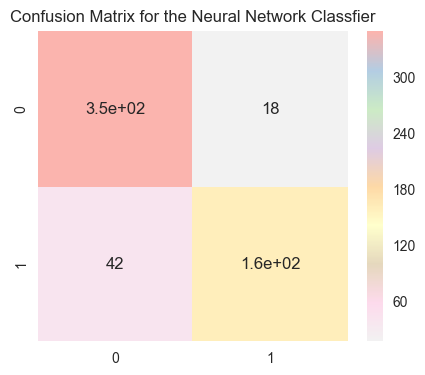

In [40]:
# now we compute some classification performance metrics 
# for the training set 
y_fit_nn = nn.predict(X_train)

accuracy_fit_nn = accuracy_score(y_train, y_fit_nn)
auc_fit_nn = roc_auc_score(y_train, y_fit_nn)

print 'accuracy score: ', accuracy_fit_nn
print 'auc score: ', auc_fit_nn

conf_fit_nn = confusion_matrix(y_train, y_fit_nn)
print 'confusion matrix: ', '\n', conf_fit_nn

plt.figure(figsize=(5,4))
sns.heatmap(conf_fit_nn, annot=True, xticklabels=target, yticklabels=target, cmap='Pastel1_r')   # 'RdPu'
plt.title('Confusion Matrix for the Neural Network Classfier', fontsize=12, verticalalignment='bottom')

accuracy score:  0.842931937173
auc score:  0.804138534634
confusion matrix:  
[[118  11]
 [ 19  43]]
true positive rate:  0.693548387097 
false positive rate:  0.0852713178295


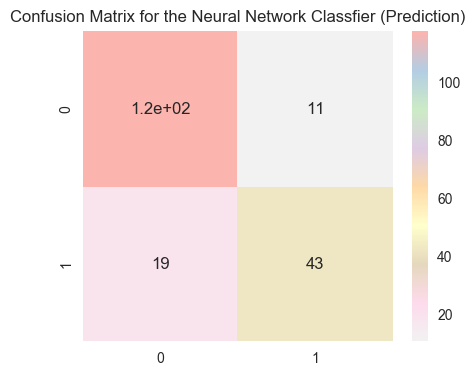

In [41]:
# we then see how our BPNN classifier performs on the testing set 
y_pred_nn = nn.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_nn)

print 'accuracy score: ', accuracy_nn
print 'auc score: ', auc_nn

conf_nn = confusion_matrix(y_test, y_pred_nn)
print 'confusion matrix: ', '\n', conf_nn

plt.figure(figsize=(5,4))
sns.heatmap(conf_nn, annot=True, xticklabels=target, yticklabels=target, cmap='Pastel1_r')
plt.title('Confusion Matrix for the Neural Network Classfier (Prediction)', fontsize=12, verticalalignment='bottom')

TP_nn = conf_nn[1,1]
TN_nn = conf_nn[0,0]
FP_nn = conf_nn[0,1]
FN_nn = conf_nn[1,0]

tpr_nn = TP_nn / float(TP_nn + FN_nn)
fpr_nn = FP_nn / float(TN_nn + FP_nn)

print 'true positive rate: ', tpr_nn, '\n', 'false positive rate: ', fpr_nn

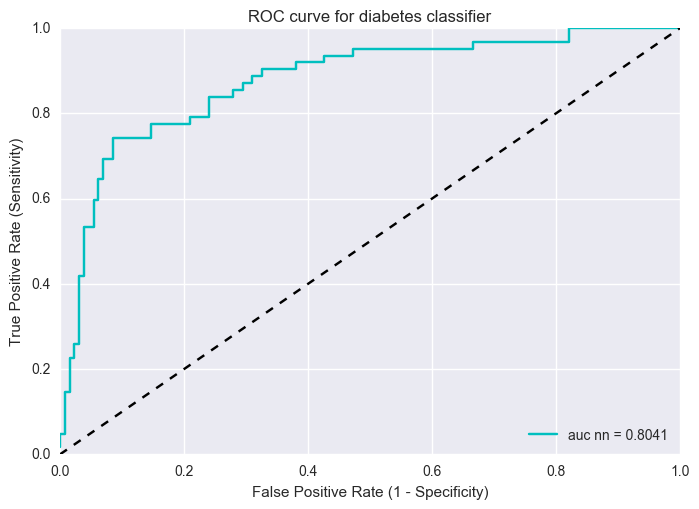

In [42]:
# and plot the ROC curve and compute AUC value
y_pred_prob_nn = nn.predict_proba(X_test)[1, :]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)

plt.hold(True)
plt.plot(fpr_nn, tpr_nn, 'c', label='auc nn = %0.4f'%auc_nn)
plt.plot([0,1], [0,1], 'k--')

plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)

In [43]:
# as a compliment, we also try the SVM and Naive Bayes classifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

svm = SVC(C=1.0, kernel='linear', probability=True, random_state=100)
svm.fit(X_train, y_train)


nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

accuracy score:  0.832460732984
auc score:  0.801968754982
confusion matrix:  
[[335  34]
 [ 62 142]]


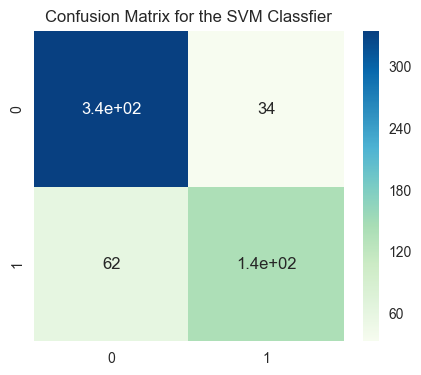

In [44]:
# now we compute some classification performance metrics 
# for the training set 
# for SVM
y_fit_svm = svm.predict(X_train)

accuracy_fit_svm = accuracy_score(y_train, y_fit_svm)
auc_fit_svm = roc_auc_score(y_train, y_fit_svm)

print 'accuracy score: ', accuracy_fit_svm
print 'auc score: ', auc_fit_svm

conf_fit_svm = confusion_matrix(y_train, y_fit_svm)
print 'confusion matrix: ', '\n', conf_fit_svm

plt.figure(figsize=(5,4))
sns.heatmap(conf_fit_svm, annot=True, xticklabels=target, yticklabels=target, cmap='GnBu')   # 'RdPu'
plt.title('Confusion Matrix for the SVM Classfier', fontsize=12, verticalalignment='bottom')

accuracy score:  0.797556719023
auc score:  0.773772517137
confusion matrix:  
[[316  53]
 [ 63 141]]


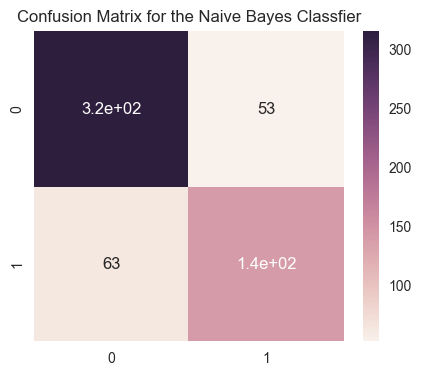

In [45]:
# for NB
y_fit_nb = nb.predict(X_train)

accuracy_fit_nb = accuracy_score(y_train, y_fit_nb)
auc_fit_nb= roc_auc_score(y_train, y_fit_nb)

print 'accuracy score: ', accuracy_fit_nb
print 'auc score: ', auc_fit_nb

conf_fit_nb = confusion_matrix(y_train, y_fit_nb)
print 'confusion matrix: ', '\n', conf_fit_nb

plt.figure(figsize=(5,4))
sns.heatmap(conf_fit_nb, annot=True, xticklabels=target, yticklabels=target)   # 'RdPu'
plt.title('Confusion Matrix for the Naive Bayes Classfier', fontsize=12, verticalalignment='bottom')

In [46]:
# we then use our testing set to see how our SVM and NB model perform
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)

for svm calssifier:  

accuracy: 0.764397905759 
auc value:  0.741810452613 

confusion matrix:  
[[104  25]
 [ 20  42]] 

for naive bayes calssifier:  

accuracy: 0.743455497382 
auc value:  0.743060765191 

confusion matrix:  
[[96 33]
 [16 46]]


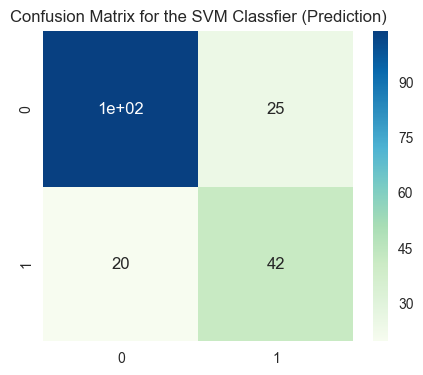

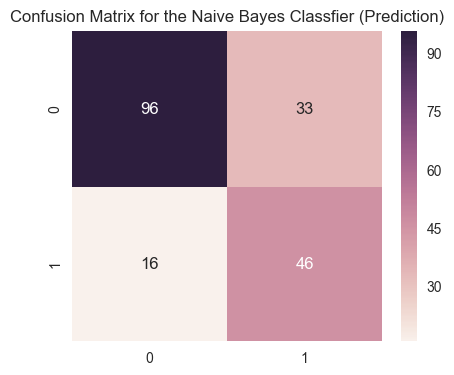

In [47]:
# now we compute some classification performance metrics 
accuracy_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_svm)
conf_svm = confusion_matrix(y_test, y_pred_svm) 

print 'for svm calssifier: ', '\n'
print 'accuracy:', accuracy_svm, '\n', 'auc value: ', auc_svm, '\n'
print 'confusion matrix: ', '\n', conf_svm, '\n'

accuracy_nb = accuracy_score(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_nb)
conf_nb = confusion_matrix(y_test, y_pred_nb) 

print 'for naive bayes calssifier: ', '\n'
print 'accuracy:', accuracy_nb, '\n', 'auc value: ', auc_nb, '\n'
print 'confusion matrix: ', '\n', conf_nb

plt.figure(figsize=(5,4))
sns.heatmap(conf_svm, annot=True, xticklabels=target, yticklabels=target, cmap='GnBu')
plt.title('Confusion Matrix for the SVM Classfier (Prediction)', fontsize=12, verticalalignment='bottom')

plt.figure(figsize=(5,4))
sns.heatmap(conf_nb, annot=True, xticklabels=target, yticklabels=target)
plt.title('Confusion Matrix for the Naive Bayes Classfier (Prediction)', fontsize=12, verticalalignment='bottom')

In [48]:
# print out the classfication reports for the predictions
r1 = classification_report(y_test, y_pred_logit)
print r1, '\n'

r2 = classification_report(y_test, y_pred_nn)
print r2, '\n'

r3 = classification_report(y_test, y_pred_svm)
print r3, '\n'

r4 = classification_report(y_test, y_pred_nb)
print r4, '\n'

             precision    recall  f1-score   support

          0       0.85      0.80      0.82       129
          1       0.63      0.71      0.67        62

avg / total       0.78      0.77      0.77       191


             precision    recall  f1-score   support

          0       0.86      0.91      0.89       129
          1       0.80      0.69      0.74        62

avg / total       0.84      0.84      0.84       191


             precision    recall  f1-score   support

          0       0.84      0.81      0.82       129
          1       0.63      0.68      0.65        62

avg / total       0.77      0.76      0.77       191


             precision    recall  f1-score   support

          0       0.86      0.74      0.80       129
          1       0.58      0.74      0.65        62

avg / total       0.77      0.74      0.75       191




In [49]:
# integrate those metrics
metrics_name = ('accuracy', 'sensitivity', 'specificity', 'precision')
logit_metrics = (0.77, 0.71, 0.80, 0.63)
nn_metrics = (0.83, 0.66, 0.91, 0.79)
svm_metrics = (0.76, 0.68, 0.81, 0.63)
nb_metrics = (0.74, 0.74, 0.74, 0.58)

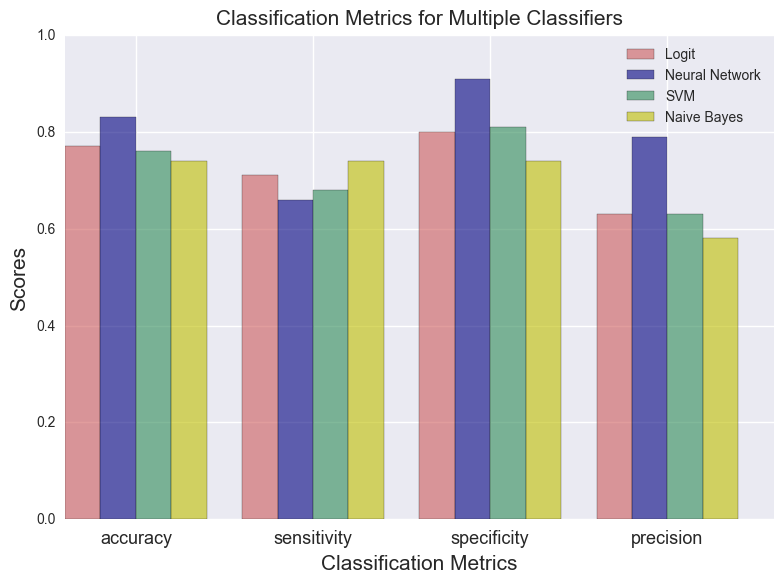

In [50]:
# compare in a bar chart
n_groups = 4
fig, ax = plt.subplots(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6

rects1 = plt.bar(index, logit_metrics, bar_width, alpha=opacity, color='indianred', label='Logit')
rects2 = plt.bar(index+bar_width, nn_metrics, bar_width, alpha=opacity, color='navy', label='Neural Network')
rects3 = plt.bar(index+2*bar_width, svm_metrics, bar_width, alpha=opacity, color='seagreen', label='SVM')
rects4 = plt.bar(index+3*bar_width, nb_metrics, bar_width, alpha=opacity, color='y', label='Naive Bayes')

plt.xlabel('Classification Metrics', fontsize=15, horizontalalignment='center')
plt.ylabel('Scores', fontsize=15)
plt.title('Classification Metrics for Multiple Classifiers', fontsize=15, verticalalignment='bottom')
plt.xticks(index+2*bar_width, metrics_name, fontsize=13)
plt.ylim(0,1)
plt.legend(fontsize=10)
plt.tight_layout()


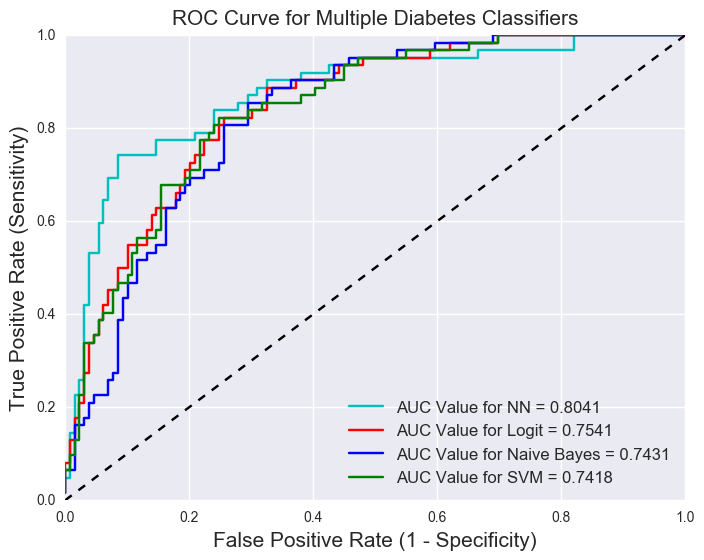

In [51]:
# see all ROCs in one chart
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)

plt.figure(figsize=(8,6))
plt.hold(True)
plt.plot(fpr_nn, tpr_nn, 'c', label='AUC Value for NN = %0.4f'%auc_nn)
plt.hold(True)
plt.plot(fpr_logit, tpr_logit, 'r', label='AUC Value for Logit = %0.4f'%auc_logit)
plt.hold(True)
plt.plot(fpr_nb, tpr_nb, 'b', label='AUC Value for Naive Bayes = %0.4f'%auc_nb)
plt.hold(True)
plt.plot(fpr_svm, tpr_svm, 'g', label='AUC Value for SVM = %0.4f'%auc_svm)
plt.hold(True)
plt.plot([0,1], [0,1], 'k--')
plt.hold(True)

plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC Curve for Multiple Diabetes Classifiers', fontsize=15, verticalalignment='bottom')
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)